# Feature selection task

Your task in this coursework will be to assess the importance of different features with CO2 emissions using the dataset you will use your final project. This exercise will provide a good foundation for understanding the features in this dataset, how they may or may not be related, and how these techniques could improve the results of your final model (or not). We will guide you through the process via prompts and some questions.

### Introduction

In the baseline notebook submitted alongside this, the modelling task focused on predicting $CO_2$ emissions using vehicle characteristics such as engine size, cylinders, and transmission. While this provided a useful technical starting point, $CO_2$ emissions are fundamentally a downstream outcome of fuel consumption. From a business perspective, this limits the direct actionability of the results: reducing emissions is the goal, but fuel consumption is the controllable design lever through which manufacturers can realistically intervene. Further, fuel consumption impacts affordability, making it an important selling point to the customer.

In this notebook, we therefore reframe the problem in a way that is more aligned with the consultancy brief. Instead of treating emissions as the primary target, we model fuel consumption directly, using three related dependent variables: city, highway, and combined fuel consumption (L/100 km). This allows us to distinguish how vehicle design choices perform under different driving conditions and to identify design trade-offs that matter in real-world usage.

This shift supports a more decision-relevant analysis. Predicting fuel consumption enables the client to understand how changes in upstream design variables (e.g. engine size, transmission type, fuel type) translate into measurable efficiency gains. This notebook therefore moves from an outcome-focused perspective (emissions) to a design-focused one (fuel efficiency), better supporting the business goal of identifying actionable vehicle configurations that improve efficiency, reduce operating costs, and meet regulatory and sustainability targets.

## Loading the data

You first need to start by downloading the data from blackboard and saving it on your local machine. Then, upload the data using pandas.

In [ ]:
import pandas as pd
import numpy as np

co2_data = pd.read_csv('CO2 Emissions_Canada.csv')
co2_data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Inspecting the data
To help familiarize yourself with the dataset, please answer the following questions: 
1. What is the number of features in this dataset?
2. How many observations (rows) are there? 
3. What are the different data types in the dataset?

In [3]:
#Data types 
co2_data.info()
co2_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

### Number of features: 12

### Number of observations: 7385

### Data types: categorical/text (object), continuous numeric (float64), integer numeric (int64)

## Pre-processing questions
1. Are there any missing values? If so, how many and in what columns?


### There are no missing values.

## Selecting numerical features 
Now we will begin the process of using the feature selection methods. As you noticed, not all of the features are numerical. As a result, we would need to first encode those categorical variables into a numerical scale. However, we will cover this in a later coursework, so for this exercise, we will only select the numerical features in the dataset. We have provided this code for you below. 

In [4]:
numeric_co2 = co2_data.select_dtypes(np.number)

## Defining the features and target variables 
Next, please define the X and y variables (from the numeric_co2 dataframe) and then split the data into training and testing datasets. Finally, normalize the X data using the StandardScaler() function

In [ ]:
#Defining the X and y (target) variables 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 


target_cols = ['Fuel Consumption City (L/100 km)', 
               'Fuel Consumption Hwy (L/100 km)', 
               'Fuel Consumption Comb (L/100 km)']
y = numeric_co2[target_cols]

X = numeric_co2.drop(columns=[
    'Fuel Consumption City (L/100 km)',
    'Fuel Consumption Hwy (L/100 km)',
    'Fuel Consumption Comb (L/100 km)'
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardise the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Check the shape of the split data
X_train.shape, X_test.shape

type(y_test)


((5908, 4), (1477, 4), (5908, 3), (1477, 3))

In [11]:
# Import Linear Regression, r2, and rmse from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train_scaled, y_train)

# Get predictions on the test set # muti y
y_pred = model.predict(X_test_scaled)

r2_values = r2_score(y_test, y_pred, multioutput='raw_values')
rmse_values = np.sqrt(mean_squared_error(y_test, y_pred, multioutput='raw_values'))

# Alternatively, if using a different version of sklearn that includes root_mean_squared_error
# from sklearn.metrics import r2_score, root_mean_squared_error
# rmse_values = root_mean_squared_error(y_test, y_pred, multioutput='raw_values')


for i in range(len(r2_values)):
    print(f"target: {y_test.columns[i]}")
    print(f"R2 Score: {r2_values[i]:.4f}")
    print(f"RMSE: {rmse_values[i]:.4f}\n")


target: Fuel Consumption City (L/100 km)
R2 Score: 0.9053
RMSE: 1.0745

target: Fuel Consumption Hwy (L/100 km)
R2 Score: 0.8282
RMSE: 0.9392

target: Fuel Consumption Comb (L/100 km)
R2 Score: 0.8965
RMSE: 0.9352



## Pearson's correlation matrix 
Please generate a pearson's correlation heat matrix and list the feature with the most positive correlation and the feature with the most negative correlation to the dependent variable. Is this suprising?

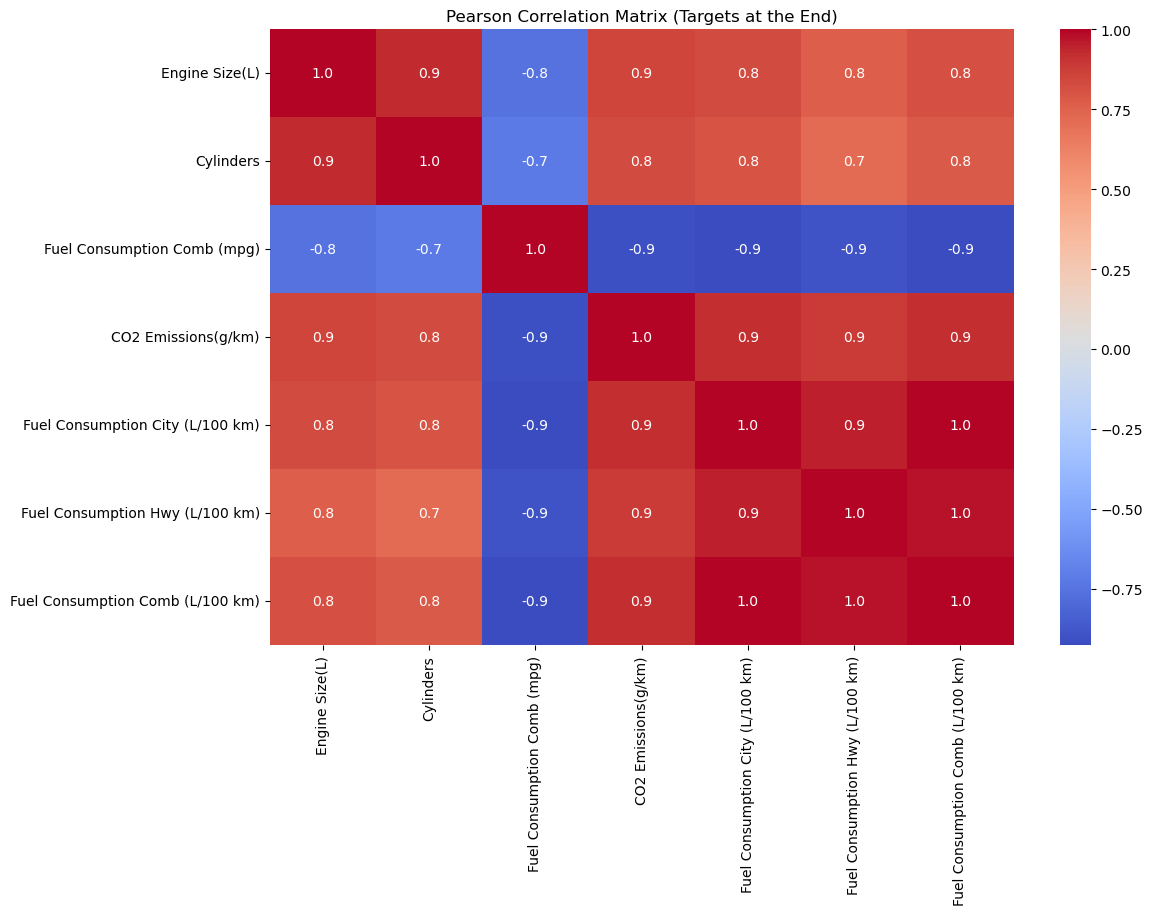

In [12]:
#Generate Pearson's heat correlation matrix 
import seaborn as sns
import matplotlib.pyplot as plt

df_visualize = pd.concat([X, Y], axis=1)
#Plot the heatmap using the sns.heatmap function 
plt.figure(figsize=(12, 8))
sns.heatmap(df_visualize.corr(), annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Pearson Correlation Matrix (Targets at the End)')
plt.show()


The Pearson correlation heatmap reveals very strong linear relationships between the fuel consumption targets and several explanatory variables. For all three dependent variables - "Fuel Consumption City (L/100 km)", "Fuel Consumption Highway (L/100 km)", and "Fuel Consumption Combined (L/100 km)" - the most strongly correlated features are "Fuel Consumption Combined (mpg)" and "$CO_2$ Emissions (g/km)".

Fuel consumption expressed in mpg shows a strong negative correlation with all three targets, reflecting the inverse relationship between miles per gallon and litres per 100 kilometres. In contrast, $CO_2$ emissions exhibit a strong positive correlation with fuel consumption, as higher fuel use directly leads to greater emissions.

In addition, engine size consistently appears as a highly informative feature, with larger engines associated with increased fuel consumption across city, highway, and combined driving conditions. These relationships are not surprising from a physical standpoint, as fuel consumption, emissions, and engine characteristics are closely linked.

The heatmap also highlights substantial multicollinearity among the fuel consumption variables, which explains why similar feature subsets are selected for all three targets and should be considered when interpreting regression results.



## Recursive feature elimination
Now we will try using recursive feature elimination to rank the importance of the different features. We have provided you with the libraries and functions you will need to use. Please answer the following questions based on your results: 
1. What are the selected features? Are the results from RFE similar or different to the Pearson's correlation matrix?

In [10]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

targets = y_train.columns  

rfe_results = {}

for t in targets:
    selector = RFE(
        estimator=RandomForestRegressor(n_estimators=100, random_state=42)
    )

    selector.fit(X_train_scaled, y_train[t])  

    feature_ranking = pd.DataFrame({
        'Feature': X_train.columns,
        'Ranking': selector.ranking_,
        'Selected': selector.support_
    }).sort_values(by='Ranking')

    rfe_results[t] = feature_ranking

    print(f"\nTarget: {t}")
    print("Selected features:")
    print(feature_ranking[feature_ranking['Selected']]['Feature'].values)

    print("Selected features:", selected_features)



Target: Fuel Consumption City (L/100 km)
Selected features:
['Fuel Consumption Comb (mpg)' 'CO2 Emissions(g/km)']
Selected features: ['Engine Size(L)', 'Fuel Consumption Comb (mpg)']

Target: Fuel Consumption Hwy (L/100 km)
Selected features:
['Fuel Consumption Comb (mpg)' 'CO2 Emissions(g/km)']
Selected features: ['Engine Size(L)', 'Fuel Consumption Comb (mpg)']

Target: Fuel Consumption Comb (L/100 km)
Selected features:
['Fuel Consumption Comb (mpg)' 'CO2 Emissions(g/km)']
Selected features: ['Engine Size(L)', 'Fuel Consumption Comb (mpg)']


## Lasso
In this last section, you will build a Lasso model to use regularization and force some feature coefficients to 0. Please print the coefficients of all features and list any features that were forced to 0. Please create a bar plot showing the importance values of each feature. 


=== Target: Fuel Consumption City (L/100 km) ===
R2: 0.8602
RMSE: 1.3057

Coefficients (all features):
Engine Size(L)                 0.317675
Cylinders                      0.000000
Fuel Consumption Comb (mpg)   -1.488005
CO2 Emissions(g/km)            0.900052
dtype: float64

Features forced to 0:
['Cylinders']


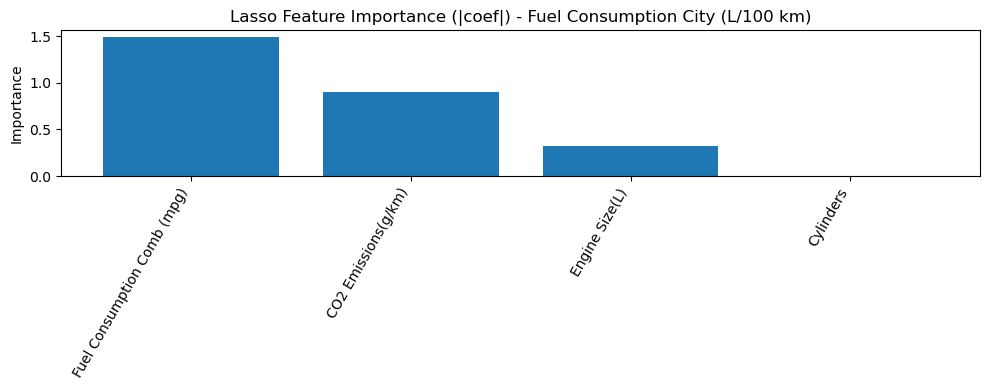


=== Target: Fuel Consumption Hwy (L/100 km) ===
R2: 0.7099
RMSE: 1.2204

Coefficients (all features):
Engine Size(L)                 0.000000
Cylinders                      0.000000
Fuel Consumption Comb (mpg)   -0.765124
CO2 Emissions(g/km)            0.560321
dtype: float64

Features forced to 0:
['Engine Size(L)', 'Cylinders']


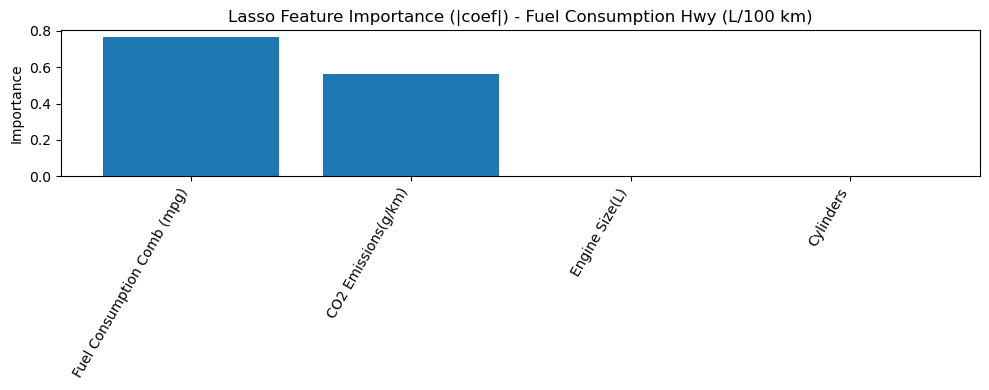


=== Target: Fuel Consumption Comb (L/100 km) ===
R2: 0.8269
RMSE: 1.2097

Coefficients (all features):
Engine Size(L)                 0.048698
Cylinders                      0.000000
Fuel Consumption Comb (mpg)   -1.155200
CO2 Emissions(g/km)            0.862001
dtype: float64

Features forced to 0:
['Cylinders']


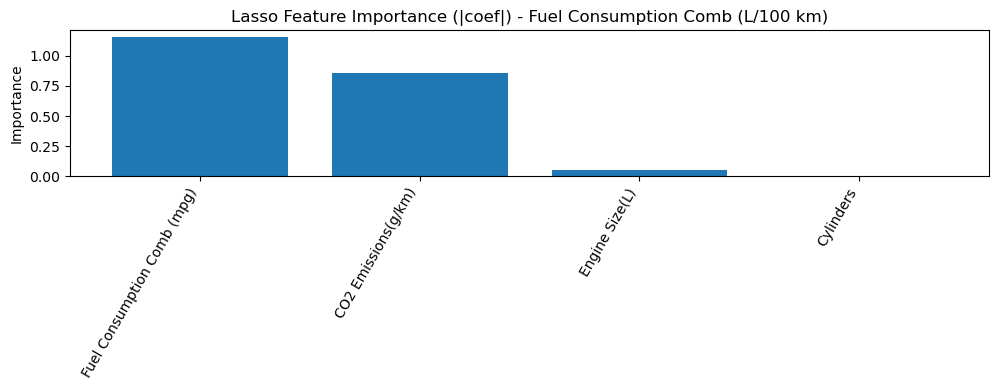

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error

alpha = 0.7  
targets = y_train.columns

lasso_results = {}

for t in targets:
    lasso = Lasso(alpha=alpha, max_iter=10000, random_state=42)
    lasso.fit(X_train_scaled, y_train[t])

    y_pred = lasso.predict(X_test_scaled)
    r2 = r2_score(y_test[t], y_pred)
    mse = mean_squared_error(y_test[t], y_pred)
    rmse = np.sqrt(mse)

    coefs = pd.Series(lasso.coef_, index=X_train.columns)
    zero_features = coefs[coefs == 0].index.tolist()

    lasso_results[t] = {
        "r2": r2,
        "rmse": rmse,
        "coefs": coefs.sort_values(key=np.abs, ascending=False),
        "zero_features": zero_features
    }

    print(f"\n=== Target: {t} ===")
    print(f"R2: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}\n")

    print("Coefficients (all features):")
    print(coefs)

    print("\nFeatures forced to 0:")
    print(zero_features)

    # Feature importance plot
    importance = coefs.abs().sort_values(ascending=False)

    plt.figure(figsize=(10, 4))
    plt.bar(importance.index, importance.values)
    plt.xticks(rotation=60, ha='right')
    plt.title(f"Lasso Feature Importance (|coef|) - {t}")
    plt.ylabel("Importance")
    plt.tight_layout()
    plt.show()


Given the inverse relationship between fuel consumption mpg and the target variables, we also perform the importance analysis excluding this feature to better understand the design levers.


=== Target: Fuel Consumption City (L/100 km) ===
R2: 0.8086
RMSE: 1.5279

Coefficients (all features):
Engine Size(L)         0.242596
Cylinders              0.000000
CO2 Emissions(g/km)    2.315480
dtype: float64

Features forced to 0:
['Cylinders']


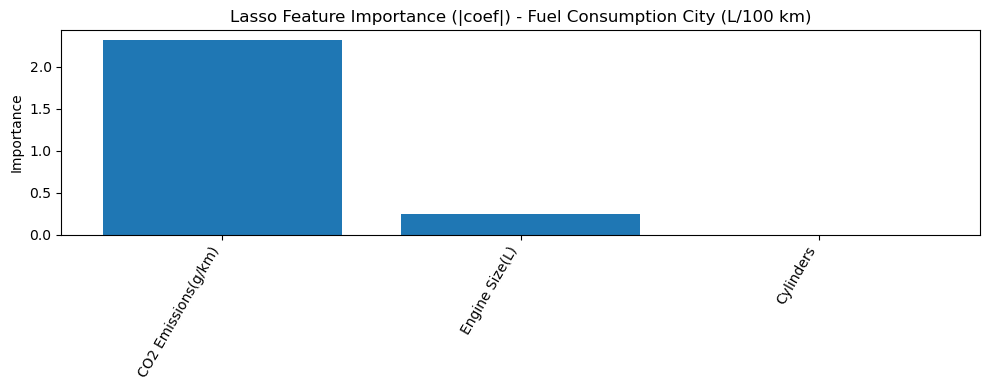


=== Target: Fuel Consumption Hwy (L/100 km) ===
R2: 0.6731
RMSE: 1.2953

Coefficients (all features):
Engine Size(L)         0.000000
Cylinders              0.000000
CO2 Emissions(g/km)    1.255266
dtype: float64

Features forced to 0:
['Engine Size(L)', 'Cylinders']


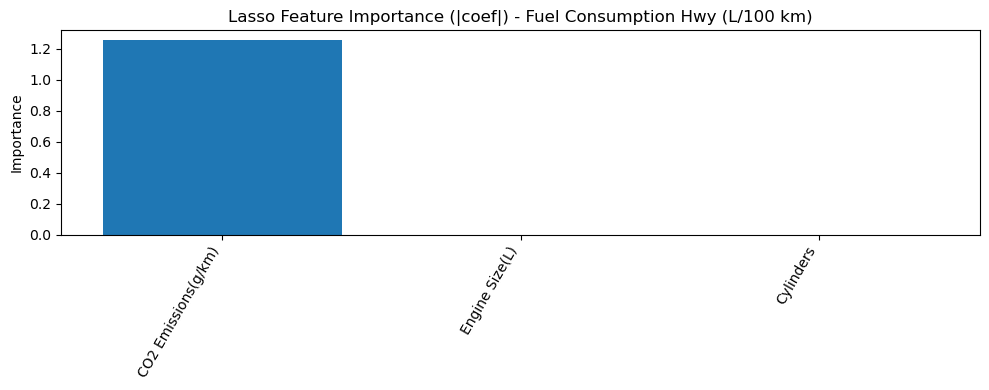


=== Target: Fuel Consumption Comb (L/100 km) ===
R2: 0.7798
RMSE: 1.3643

Coefficients (all features):
Engine Size(L)         0.000000
Cylinders              0.000000
CO2 Emissions(g/km)    1.952695
dtype: float64

Features forced to 0:
['Engine Size(L)', 'Cylinders']


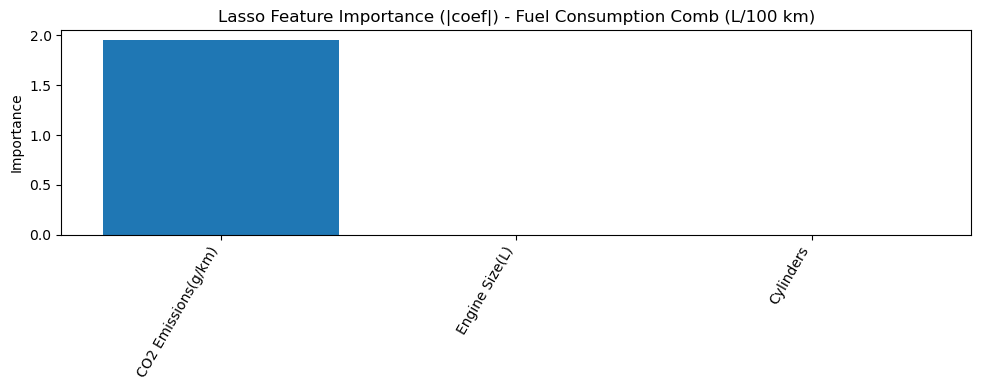

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error
target_cols = ['Fuel Consumption City (L/100 km)', 
               'Fuel Consumption Hwy (L/100 km)', 
               'Fuel Consumption Comb (L/100 km)']
y1 = numeric_co2[target_cols]

X1 = numeric_co2.drop(columns=[
    'Fuel Consumption City (L/100 km)',
    'Fuel Consumption Hwy (L/100 km)',
    'Fuel Consumption Comb (L/100 km)',
    'Fuel Consumption Comb (mpg)'
])

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Standardise the data
scaler = StandardScaler()
X_train_scaled1 = scaler.fit_transform(X_train1)
X_test_scaled1 = scaler.fit_transform(X_test1)

alpha = 0.7  
targets = y_train.columns

lasso_results = {}

for t in targets:
    lasso = Lasso(alpha=alpha, max_iter=10000, random_state=42)
    lasso.fit(X_train_scaled1, y_train1[t])

    y_pred = lasso.predict(X_test_scaled1)
    r2 = r2_score(y_test1[t], y_pred)
    mse = mean_squared_error(y_test[t], y_pred)
    rmse = np.sqrt(mse)

    coefs = pd.Series(lasso.coef_, index=X_train1.columns)
    zero_features = coefs[coefs == 0].index.tolist()

    lasso_results[t] = {
        "r2": r2,
        "rmse": rmse,
        "coefs": coefs.sort_values(key=np.abs, ascending=False),
        "zero_features": zero_features
    }

    print(f"\n=== Target: {t} ===")
    print(f"R2: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}\n")

    print("Coefficients (all features):")
    print(coefs)

    print("\nFeatures forced to 0:")
    print(zero_features)

    # Feature importance plot
    importance = coefs.abs().sort_values(ascending=False)

    plt.figure(figsize=(10, 4))
    plt.bar(importance.index, importance.values)
    plt.xticks(rotation=60, ha='right')
    plt.title(f"Lasso Feature Importance (|coef|) - {t}")
    plt.ylabel("Importance")
    plt.tight_layout()
    plt.show()

The importance is again dominated by a single variable, this time $CO_2$ emissions which is itself largely determined by fuel consumption. As such, its exclusion may be prudent, which is done in the following section (with further inclusion of categorical variables). Excluding CO$_2$ emissions without introducing additional explanatory variables would leave a highly restricted numerical feature set, limiting the model's ability to capture meaningful variation in fuel consumption. For this reason, $CO_2$ emissions are excluded in the following section, and the feature space is expanded through the inclusion of categorical variables (vehicle class, transmission type, and fuel type). This allows the model to incorporate structural design information that is both independent of the target and directly actionable from a business and engineering perspective.

## Inclusion of categorical variables

We also performed additional modelling that included categorical variables, which were one-hot encoded. Each category level was represented as a separate binary feature, with a value of 1 indicating that an observation belongs to that category and 0 otherwise. This required using the `MultiTaskLasso` in order to work with multiple target variables. We still note the importance of the original numerical features ("Engine Size(L)", "Cylinders", "CO2 Emissions(g/km)"), but further that fuel type is emerges as an important predictor. However, the magnitude of its coefficient should not necessarily be interpreted as indicating greater explanatory strength relative to numerical variables. This is partly due to the differing nature of standardised continuous features and one-hot encoded categorical indicators, as well as the structural role of fuel type in shifting baseline fuel consumption. Consequently, coefficient magnitudes are not directly comparable across feature types. We then note that, while certain vehicle classes and transmission types also seem to have some explanatory power, this is generally weaker than that of the variables mentioned hitherto. The Lasso regularisation also thrinks a large proportion of these to 0, further indicating minimal impact.

We then perform the analysis again, this time excluding "CO2 Emissions(g/km)" for the reasons given above. This leads to an increase in the importance of the categorical feature classes and may be of greater use with respect to informing design decisions.

All coefficients (by target):
                                    feature  coef_Fuel Consumption City (L/100 km)  imp_Fuel Consumption City (L/100 km)  coef_Fuel Consumption Hwy (L/100 km)  imp_Fuel Consumption Hwy (L/100 km)  coef_Fuel Consumption Comb (L/100 km)  imp_Fuel Consumption Comb (L/100 km)
                        num__Engine Size(L)                               0.133012                              0.133012                             -0.067912                             0.067912                               0.042513                              0.042513
                             num__Cylinders                               0.095705                              0.095705                             -0.120230                             0.120230                              -0.002132                              0.002132
                   num__CO2 Emissions(g/km)                               2.937433                              2.937433                              1

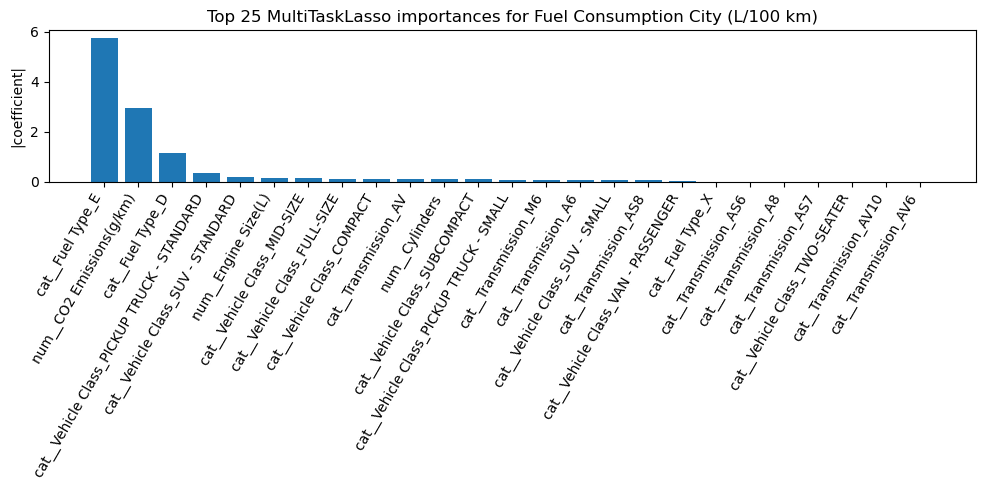

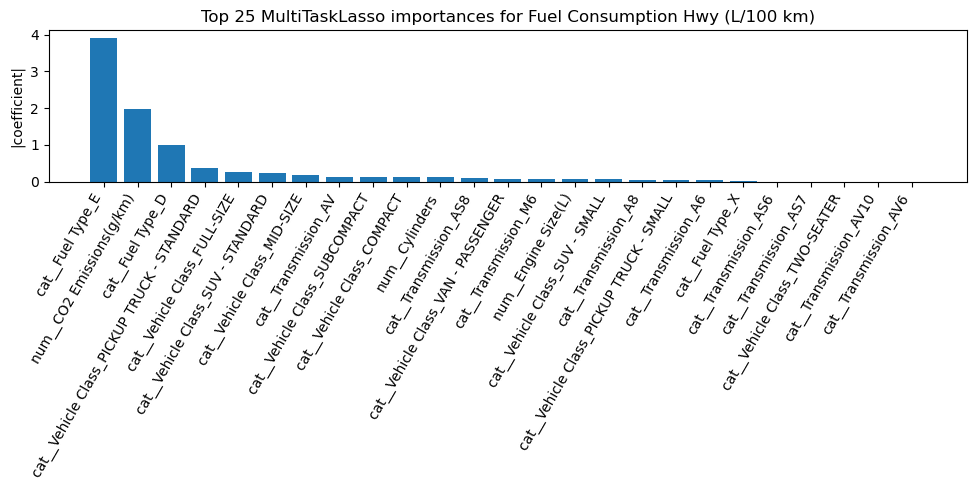

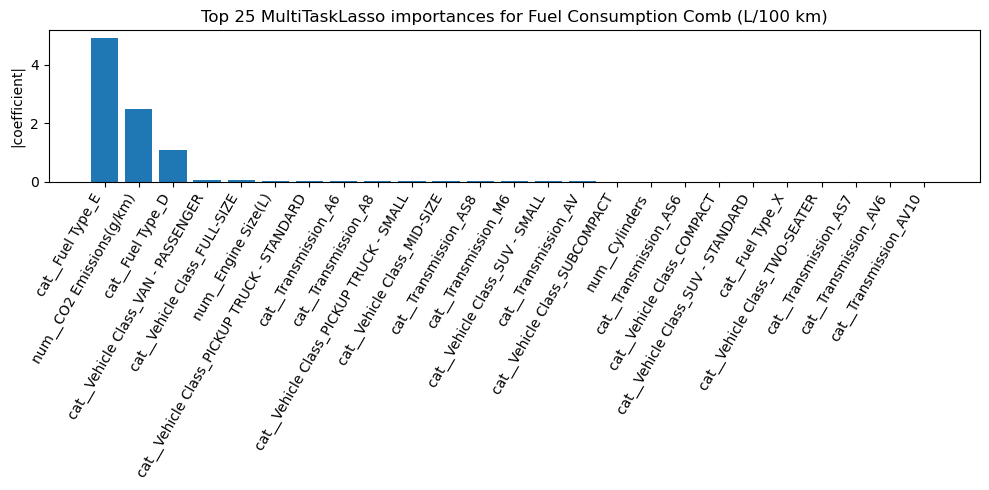

MultiTaskLasso pipeline R2 scores:
target: Fuel Consumption City (L/100 km)
R2 Score: 0.9860

target: Fuel Consumption Hwy (L/100 km)
R2 Score: 0.9606

target: Fuel Consumption Comb (L/100 km)
R2 Score: 0.9917

MultiTaskLasso pipeline RMSE values:
target: Fuel Consumption City (L/100 km)
RMSE: 0.4136

target: Fuel Consumption Hwy (L/100 km)
RMSE: 0.4496

target: Fuel Consumption Comb (L/100 km)
RMSE: 0.2649



In [22]:
from sklearn.linear_model import MultiTaskLasso
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import MultiTaskLasso

target = ["Fuel Consumption City (L/100 km)", "Fuel Consumption Hwy (L/100 km)", "Fuel Consumption Comb (L/100 km)"]

# Drop Make, Model, and mpg target (which is redundant with L/100 km targets)
X = co2_data.drop(columns=["Make", "Model", "Fuel Consumption Comb (mpg)"] + target)
y = co2_data[target]

cat_cols = ["Vehicle Class", "Transmission", "Fuel Type"]
num_cols = [c for c in X.columns if c not in cat_cols]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ],
    remainder="drop"
)

to_dense = FunctionTransformer(lambda x: x.toarray() if hasattr(x, "toarray") else x)

lasso_pipe = Pipeline(steps=[
    ("prep", preprocess),
    ("dense", to_dense),
    ("lasso", MultiTaskLasso(alpha=0.01, max_iter=10000, random_state=42))
])

lasso_pipe.fit(X_train, y_train)

feature_names = lasso_pipe.named_steps["prep"].get_feature_names_out()
coefs = np.atleast_2d(lasso_pipe.named_steps["lasso"].coef_)  # (n_targets, n_features)

target_names = list(y_train.columns) if hasattr(y_train, "columns") else [f"target_{i}" for i in range(coefs.shape[0])]

# coefficients table (wide) 
coef_df = pd.DataFrame({"feature": feature_names})
for i, t in enumerate(target_names):
    coef_df[f"coef_{t}"] = coefs[i, :]
    coef_df[f"imp_{t}"] = np.abs(coefs[i, :])

print("All coefficients (by target):")
print(coef_df.to_string(index=False))

# forced to zero (per target)
for t in target_names:
    zeros = coef_df.loc[coef_df[f"coef_{t}"] == 0, "feature"].tolist()
    print(f"\nFeatures forced to 0 for {t} ({len(zeros)}/{len(feature_names)}):")
    print(zeros)

# bar plots (top 25 per target)
top_k = 25
for t in target_names:
    plot_df = coef_df[["feature", f"imp_{t}"]].sort_values(f"imp_{t}", ascending=False).head(top_k)

    plt.figure(figsize=(10, 5))
    plt.bar(plot_df["feature"], plot_df[f"imp_{t}"])
    plt.xticks(rotation=60, ha="right")
    plt.ylabel("|coefficient|")
    plt.title(f"Top {top_k} MultiTaskLasso importances for {t}")
    plt.tight_layout()
    plt.show()

print("MultiTaskLasso pipeline R2 scores:")
y_pred = lasso_pipe.predict(X_test)
r2_values = r2_score(y_test, y_pred, multioutput='raw_values')
for i in range(len(r2_values)):
    print(f"target: {y_test.columns[i]}")
    print(f"R2 Score: {r2_values[i]:.4f}\n")
    plt.show()

print("MultiTaskLasso pipeline RMSE values:")
y_pred = lasso_pipe.predict(X_test)
rmse_values = np.sqrt(mean_squared_error(y_test, y_pred, multioutput='raw_values'))
for i in range(len(rmse_values)):
    print(f"target: {y_test.columns[i]}")
    print(f"RMSE: {rmse_values[i]:.4f}\n")

The major improvements in both $R^2$ and RMSE indicate the inclusion of categorical variables increased the explanatory power of the model, however we will confirm this below with a further model excluding $CO_2$. A decrease in explanatory power can be expected here, given it was noted that fuel consumption directly causes $CO_2$ emissions, but it is important to determine whether the model is still functional.

All coefficients (by target):
                                    feature  coef_Fuel Consumption City (L/100 km)  imp_Fuel Consumption City (L/100 km)  coef_Fuel Consumption Hwy (L/100 km)  imp_Fuel Consumption Hwy (L/100 km)  coef_Fuel Consumption Comb (L/100 km)  imp_Fuel Consumption Comb (L/100 km)
                        num__Engine Size(L)                               1.426704                              1.426704                              0.734479                             0.734479                               1.116038                              1.116038
                             num__Cylinders                               1.114184                              1.114184                              0.603739                             0.603739                               0.883629                              0.883629
                 cat__Vehicle Class_COMPACT                              -0.684578                              0.684578                             -0

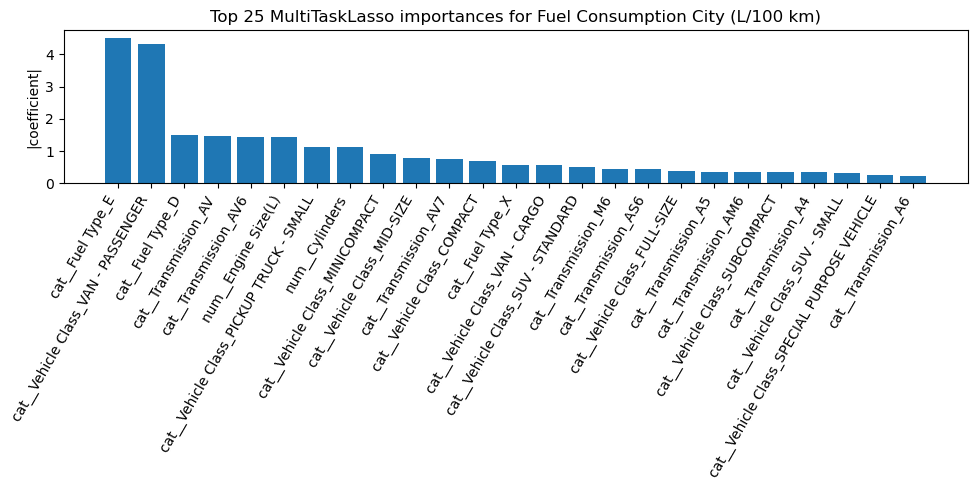

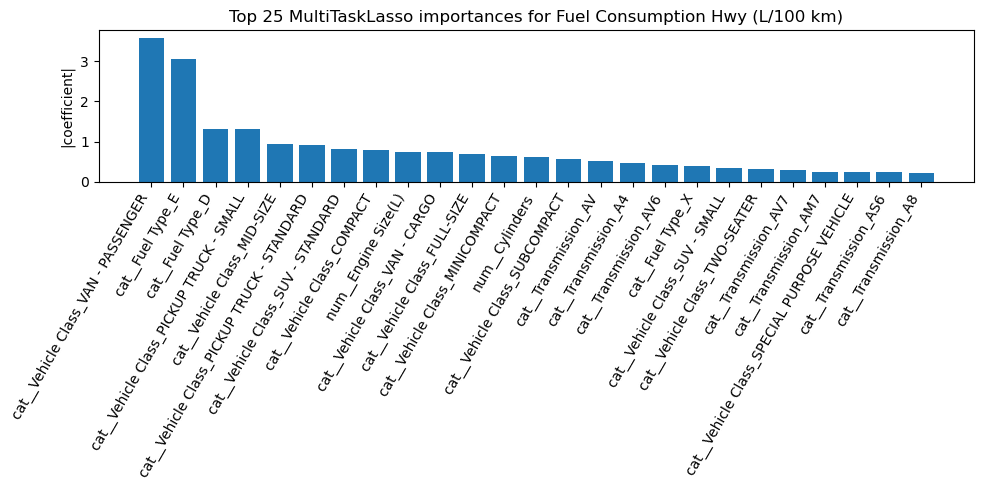

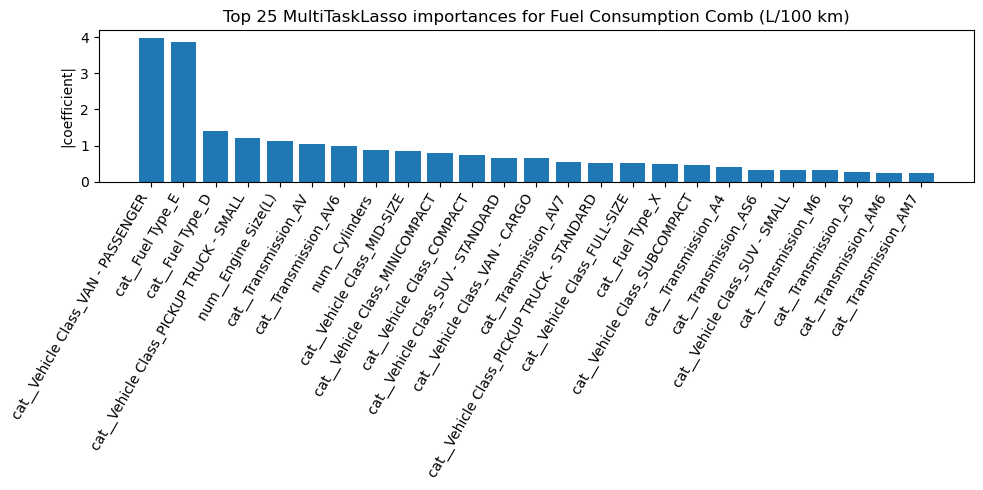

MultiTaskLasso pipeline R2 scores:
target: Fuel Consumption City (L/100 km)
R2 Score: 0.8748

target: Fuel Consumption Hwy (L/100 km)
R2 Score: 0.8591

target: Fuel Consumption Comb (L/100 km)
R2 Score: 0.8782

MultiTaskLasso pipeline RMSE values:
target: Fuel Consumption City (L/100 km)
RMSE: 1.2355

target: Fuel Consumption Hwy (L/100 km)
RMSE: 0.8504

target: Fuel Consumption Comb (L/100 km)
RMSE: 1.0146



In [23]:
from sklearn.linear_model import MultiTaskLasso
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import MultiTaskLasso

target = ["Fuel Consumption City (L/100 km)", "Fuel Consumption Hwy (L/100 km)", "Fuel Consumption Comb (L/100 km)"]

# Drop Make, Model, and mpg target (which is redundant with L/100 km targets)
X = co2_data.drop(columns=["Make", "Model", "Fuel Consumption Comb (mpg)", "CO2 Emissions(g/km)"] + target)
y = co2_data[target]

cat_cols = ["Vehicle Class", "Transmission", "Fuel Type"]
num_cols = [c for c in X.columns if c not in cat_cols]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ],
    remainder="drop"
)

to_dense = FunctionTransformer(lambda x: x.toarray() if hasattr(x, "toarray") else x)

lasso_pipe = Pipeline(steps=[
    ("prep", preprocess),
    ("dense", to_dense),
    ("lasso", MultiTaskLasso(alpha=0.01, max_iter=10000, random_state=42))
])

lasso_pipe.fit(X_train, y_train)

feature_names = lasso_pipe.named_steps["prep"].get_feature_names_out()
coefs = np.atleast_2d(lasso_pipe.named_steps["lasso"].coef_)  # (n_targets, n_features)

target_names = list(y_train.columns) if hasattr(y_train, "columns") else [f"target_{i}" for i in range(coefs.shape[0])]

# coefficients table (wide) 
coef_df = pd.DataFrame({"feature": feature_names})
for i, t in enumerate(target_names):
    coef_df[f"coef_{t}"] = coefs[i, :]
    coef_df[f"imp_{t}"] = np.abs(coefs[i, :])

print("All coefficients (by target):")
print(coef_df.to_string(index=False))

# forced to zero (per target)
for t in target_names:
    zeros = coef_df.loc[coef_df[f"coef_{t}"] == 0, "feature"].tolist()
    print(f"\nFeatures forced to 0 for {t} ({len(zeros)}/{len(feature_names)}):")
    print(zeros)

# bar plots (top 25 per target)
top_k = 25
for t in target_names:
    plot_df = coef_df[["feature", f"imp_{t}"]].sort_values(f"imp_{t}", ascending=False).head(top_k)

    plt.figure(figsize=(10, 5))
    plt.bar(plot_df["feature"], plot_df[f"imp_{t}"])
    plt.xticks(rotation=60, ha="right")
    plt.ylabel("|coefficient|")
    plt.title(f"Top {top_k} MultiTaskLasso importances for {t}")
    plt.tight_layout()
    plt.show()

print("MultiTaskLasso pipeline R2 scores:")
y_pred = lasso_pipe.predict(X_test)
r2_values = r2_score(y_test, y_pred, multioutput='raw_values')
for i in range(len(r2_values)):
    print(f"target: {y_test.columns[i]}")
    print(f"R2 Score: {r2_values[i]:.4f}\n")
    plt.show()

print("MultiTaskLasso pipeline RMSE values:")
y_pred = lasso_pipe.predict(X_test)
rmse_values = np.sqrt(mean_squared_error(y_test, y_pred, multioutput='raw_values'))
for i in range(len(rmse_values)):
    print(f"target: {y_test.columns[i]}")
    print(f"RMSE: {rmse_values[i]:.4f}\n")

Given we still note an improvement with respect to model metrics with the exclusion of $CO_2$, it can be inferred that the inclusion of $CO_2$ emissions was not essential for model performance, and that the observed predictive capability is driven by genuinely explanatory features rather than mechanically related targets. This indicates that the design-relevant data is sufficient to provide an accurate prediction of the target.

## Conclusion

You should now have a comprehensive chunk of code to look back on and use for your final project when completing feature selection! This process is also useful for analyzing your data and making sense of results, which is one of the most important parts of machine learning research. 

This analysis demonstrates that the dataset contains strong predictive power for fuel consumption across city, highway, and combined driving conditions, with linear and regularised models achieving high $R^2$ values and low RMSE in several specifications. However, the results also highlight an important modelling consideration: when included, CO$_2$ emissions and fuel consumption expressed in mpg consistently dominate feature importance. Both variables are closely and mechanically linked to the targets (fuel consumption in L/100 km), meaning that their inclusion largely reflects a reparameterisation of the response variable rather than the identification of independent drivers of efficiency.

For this reason, excluding CO$_2$ emissions and mpg-based fuel consumption may be appropriate in further analysis when the objective is to generate actionable, design-relevant insights. Notably, model performance remains strong after this exclusion, indicating that the predictive capability is not solely driven by downstream or mechanically related variables, but by genuinely explanatory features. This suggests that the available design-relevant data is sufficient to support accurate prediction of fuel consumption.

Once attention is restricted to upstream vehicle characteristics, several features emerge as broadly important. Among numerical predictors, engine size consistently contributes explanatory power, as does the cylinder count, though to a lesser degree. Among categorical variables, fuel type shows the strongest and most consistent effects across all targets, with E and D fuel types introducing large systematic shifts in fuel consumption. Vehicle class also plays a meaningful role, particularly for larger classes such as pickup trucks, SUVs, and vans, while transmission type contributes more moderately, with certain automatic and continuously variable transmissions exhibiting non-negligible effects.

Finally, while these results indicate that the dataset is informative, further testing is required to assess its suitability for robust business decision-making. Additional validation, sensitivity analysis, and comparison against alternative model classes are needed to determine whether performance remains acceptable under stricter feature constraints, or whether supplementary data (such as vehicle mass, drivetrain configuration, or aerodynamic properties) would be required to support more confident and operationally useful recommendations.
